In [3]:
# Original data from J. Chem. Phys. 139, 144905 (2013)
# https://aip-scitation-org.libproxy.mit.edu/doi/10.1063/1.4823834

# Data extracted from Phys. Rev. E 102, 052503 (2020)
# https://journals.aps.org/pre/abstract/10.1103/PhysRevE.102.052503

pexp = [0.904692435,0.87023125,0.8192217,0.77408916,0.729882225,0.6958612,0.662366135,0.59442514,0.52941673]
Gexp = [0.8228313,0.78116745,0.67843145,0.59356475,0.5012501,0.40295064,0.2837868,0.22728308,0.17673337]
Gerr = [0.0863992,0.07605058,0.07014025,0.05678171,0.05085794,0.03744674,0.0299495,0.02119352,0.01987418]
Texp = [0.9331182,0.8810204,0.72910213,0.70832443,0.58321744,0.47448942,0.4909461,0.3897293,0.34216022]


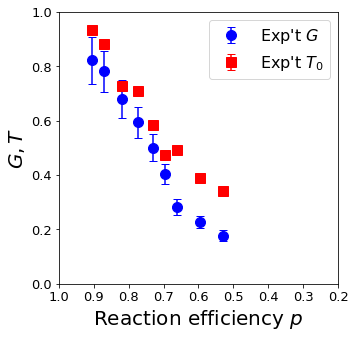

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()

plt.errorbar(pexp,Gexp,yerr=Gerr,color='b',capsize=4,marker='o',markersize=10,linestyle='',label='Exp\'t $G$')
plt.errorbar(pexp,Texp,yerr=0,color='r',capsize=4,marker='s',markersize=10,linestyle='',label='Exp\'t $T_0$')
    
plt.xlim((1,0.2))
plt.ylim((0,1))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=16)
plt.xlabel('Reaction efficiency $p$',fontsize=20)
plt.ylabel(r"$G, T$",fontsize=20)
ax.figure.set_size_inches(5, 5)
plt.show()

In [53]:
import numpy as np
from scipy.optimize import fsolve

n_pt = 21
p = np.linspace(1,0.2,n_pt)

def Rfunc(p):
    if isinstance(p,np.ndarray):
        pass
    else:
        p = np.array(p)
    def func(R,p):
        return p*R**3 + (1-p) - R
    x0 = np.zeros(p.shape)
    R = fsolve(func,x0,args=(p))
    return R

def Gfunc(p):
    R = Rfunc(p)
    return 0.5 * (  3 *(4*3*2*1)/(3*2*1)/(1) *(1-R)**3 *R   \
                  + 4 *(4*3*2*1)/(4*3*2*1)/(1) *(1-R)**4  )

def Tfunc(p):
    R = Rfunc(p)
    return 0.5 * (  2 *(4*3*2*1)/(2*1)/(2*1) *(1-R)**2 *R**2  \
                  + 3 *(4*3*2*1)/(3*2*1)/(1) *(1-R)**3 *R  \
                  + 4 *(4*3*2*1)/(4*3*2*1)/(1) *(1-R)**4  )

G = Gfunc(p)/Gfunc(1)
T = Tfunc(p)/Tfunc(1)
#print(G)


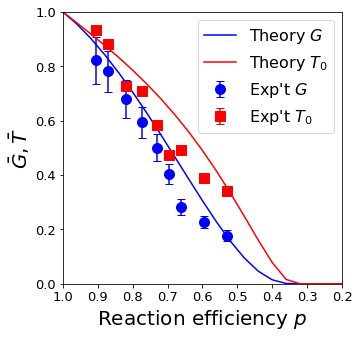

In [63]:
fig = plt.figure()
ax = plt.gca()

plt.errorbar(pexp,Gexp,yerr=Gerr,color='b',capsize=4,marker='o',markersize=10,linestyle='',label='Exp\'t $G$')
plt.errorbar(pexp,Texp,yerr=0,color='r',capsize=4,marker='s',markersize=10,linestyle='',label='Exp\'t $T_0$')
plt.plot(p,G,color='b',marker='',markersize=10,linestyle='-',label='Theory $G$')
plt.plot(p,T,color='r',marker='',markersize=10,linestyle='-',label='Theory $T_0$')

    
plt.xlim((1,0.2))
plt.ylim((0,1))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=16)
plt.xlabel('Reaction efficiency $p$',fontsize=20)
plt.ylabel(r"$\bar{G}, \bar{T}$",fontsize=20)
ax.figure.set_size_inches(5, 5)
plt.show()

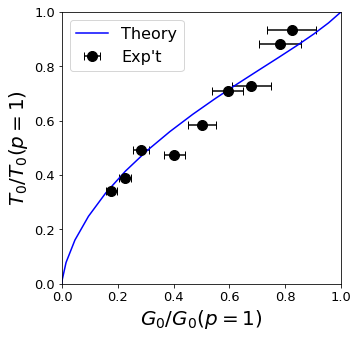

In [61]:
fig = plt.figure()
ax = plt.gca()

plt.errorbar(Gexp,Texp,xerr=Gerr,color='k',capsize=4,marker='o',markersize=10,linestyle='',label='Exp\'t')
#plt.errorbar(pexp,Texp,yerr=0,color='r',capsize=4,marker='s',markersize=10,linestyle='',label='Exp\'t $T_0$')
plt.plot(G,T,color='b',marker='',markersize=10,linestyle='-',label='Theory')
#plt.plot(p,T,color='r',marker='',markersize=10,linestyle='-',label='Theory $T_0$')


plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=16)
plt.xlabel(r"$G_0/G_0(p=1)$",fontsize=20)
plt.ylabel(r"$T_0/T_0(p=1)$",fontsize=20)
ax.figure.set_size_inches(5, 5)
plt.show()